# Bitcoin Price Prediction with Regression Models

This notebook implements Linear Regression, Ridge Regression, and Lasso Regression models to predict Bitcoin prices using the preprocessed data.

Authors: Hoda Abokhadra, Philip Myint, Bryan Reynolds, Taha Wasiq 

In [1]:
import importlib
import BitcoinModeler

import importlib
importlib.reload(BitcoinModeler)

from BitcoinModeler import *


In [2]:
# Use LaTeX fonts for figures and set font size of tick labels.
plt.rc('text', usetex=True)
plt.rc('font', family='serif', weight='bold')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# Hex codes of Matplotlib Tableau color palette: blue, orange, green, red, purple, brown, pink, gray, olive, cyan. 
plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# XKCD colors (https://xkcd.com/color/rgb/): teal, magenta, sea green, bright pink, dark orange, goldenrod, forest, dirt, coral, baby blue, peach.
plot_colors.extend(['#029386', '#c20078', '#53fca1', '#fe01b1', '#c65102', '#fac205', '#0b5509', '#8a6e45', '#fc5a50', '#a2cffe', '#ffb07c'])

# Define the directory to place plots/figures generated in this script.
plot_dir = './../report/figures/'

# Bitcoin Price Prediction

This notebook trains simple linear models for BTC price horizons **H1** (1 day) and **H7** (7 days), evaluates them on **Train/Validation/Test**, plots performance


## üß± Data & Splits

We load preprocessed CSVs for both horizons:

- **Train**: used to fit model parameters  
- **Validation (val)**: used to choose models/hyperparameters (no peeking at Test)  
- **Test**: used once at the end for an unbiased performance estimate




In [3]:
# Load h1 data
data_dir = './../data/processed/'
h1_train = pd.read_csv(data_dir + 'h1_vif_train.csv')
h1_val = pd.read_csv(data_dir + 'h1_vif_val.csv')
h1_test = pd.read_csv(data_dir + 'h1_vif_test.csv')

# Load h7 data
h7_train = pd.read_csv(data_dir + 'h7_vif_train.csv')
h7_val = pd.read_csv(data_dir + 'h7_vif_val.csv')
h7_test = pd.read_csv(data_dir + 'h7_vif_test.csv')

print(f"H1 - Train: {h1_train.shape}, Val: {h1_val.shape}, Test: {h1_test.shape}")
print(f"H7 - Train: {h7_train.shape}, Val: {h7_val.shape}, Test: {h7_test.shape}")

H1 - Train: (1877, 60), Val: (402, 60), Test: (403, 60)
H7 - Train: (1873, 60), Val: (401, 60), Test: (402, 60)


In [4]:
bundle_h1=BitcoinModeler.DataManager.prepare(h1_train, h1_val, h1_test, "y_btc_close_t+1", "H1")
bundle_h7=BitcoinModeler.DataManager.prepare(h7_train, h7_val, h7_test, "y_btc_close_t+7", "H7")

> Note: Features are **already z-score normalized using train-only stats** in `split.py` to avoid leakage.

In [5]:
# optional if you want to compare scaled vs unscaled 
#scaler_h1_cls = ScalerManager()
#bundle_h1_scaled = scaler_h1_cls.scale_bundle(bundle_h1)

#scaler_h7_cls = ScalerManager()
#bundle_h7_scaled = scaler_h7_cls.scale_bundle(bundle_h7)
#print("Class-based DataBundle objects created (both raw and scaled variants).")


## üöÄ Model Runs

We fit all three models on **H1 (1-day)** and **H7 (7-day)** horizons, then print per-split metrics.


In [6]:
# === Run experiments
importlib.reload(BitcoinModeler)
runner_h1 = BitcoinModeler.ExperimentRunner(bundle_h1, scaled=True)
df_h1 = runner_h1.run()

runner_h7 = BitcoinModeler.ExperimentRunner(bundle_h7, scaled=True)
df_h7 = runner_h7.run()


Bundle:  H1 Spline columns (selected): ['btc_atr14', 'btc_macd', 'btc_roll_std_close_7', 'btc_rsi14']
Bundle:  H1 Passthrough features     : 54
Bundle:  H1 Best params: {'pre__spl__n_knots': 8, 'ridge__alpha': 91.18425196146562} | Val MSE: 634.5138004960418
Bundle:  H7 Spline columns (selected): ['btc_atr14', 'btc_macd', 'btc_roll_std_close_7', 'btc_rsi14']
Bundle:  H7 Passthrough features     : 54
Bundle:  H7 Best params: {'pre__spl__n_knots': 8, 'ridge__alpha': 37.59674965785467} | Val MSE: 3075.070228327343


## üìä Results Table (All Models √ó Splits)


In [7]:

# Merge all for a single summary table 
results_df_classes = pd.concat([df_h1, df_h7], ignore_index=True)
print("\n‚Äî‚Äî‚Äî CLASS-BASED RESULTS SUMMARY ‚Äî‚Äî‚Äî")
print(results_df_classes.to_string(index=False, float_format="%.6f"))


‚Äî‚Äî‚Äî CLASS-BASED RESULTS SUMMARY ‚Äî‚Äî‚Äî
Horizon Scaled?               Model    Dataset            MSE        RMSE         MAE  RMSE_ND   MAE_ND       R2
     H1     Yes              Linear Validation    4946.599768   70.332068   57.006248 0.465946 0.377663 0.782894
     H1     Yes              Linear       Test 1544242.443763 1242.675518  795.161294 0.269260 0.172294 0.927499
     H1     Yes               Ridge Validation    3861.436130   62.140455   49.692989 0.411677 0.329213 0.830522
     H1     Yes               Ridge       Test 1255825.040431 1120.635998  699.768869 0.242817 0.151624 0.941040
     H1     Yes               Lasso Validation    5263.245426   72.548228   61.238193 0.480628 0.405700 0.768997
     H1     Yes               Lasso       Test 1706165.085268 1306.202544  844.652020 0.283025 0.183017 0.919897
     H1     Yes B-Spline with Ridge Validation     634.513800   25.189557   14.402560 0.166879 0.095416 0.972151
     H1     Yes B-Spline with Ridge       Test 

## üìà Lasso Performance ‚Äî Validation vs Test

The chart below compares **Nonzero** vs **Zero** coefficients for each horizon (H1, H7).  



In [8]:
# Feature importance for Lasso models
lasso_h1 = [m for m in runner_h1.models if m.name == "Lasso"][0]
lasso_h7 = [m for m in runner_h7.models if m.name == "Lasso"][0]
H1LassoModelWrap = ModelWrapper("H1", lasso_h1.model)
H7LassoModelWrap = ModelWrapper("H7", lasso_h7.model)

Feature Importance Analysis


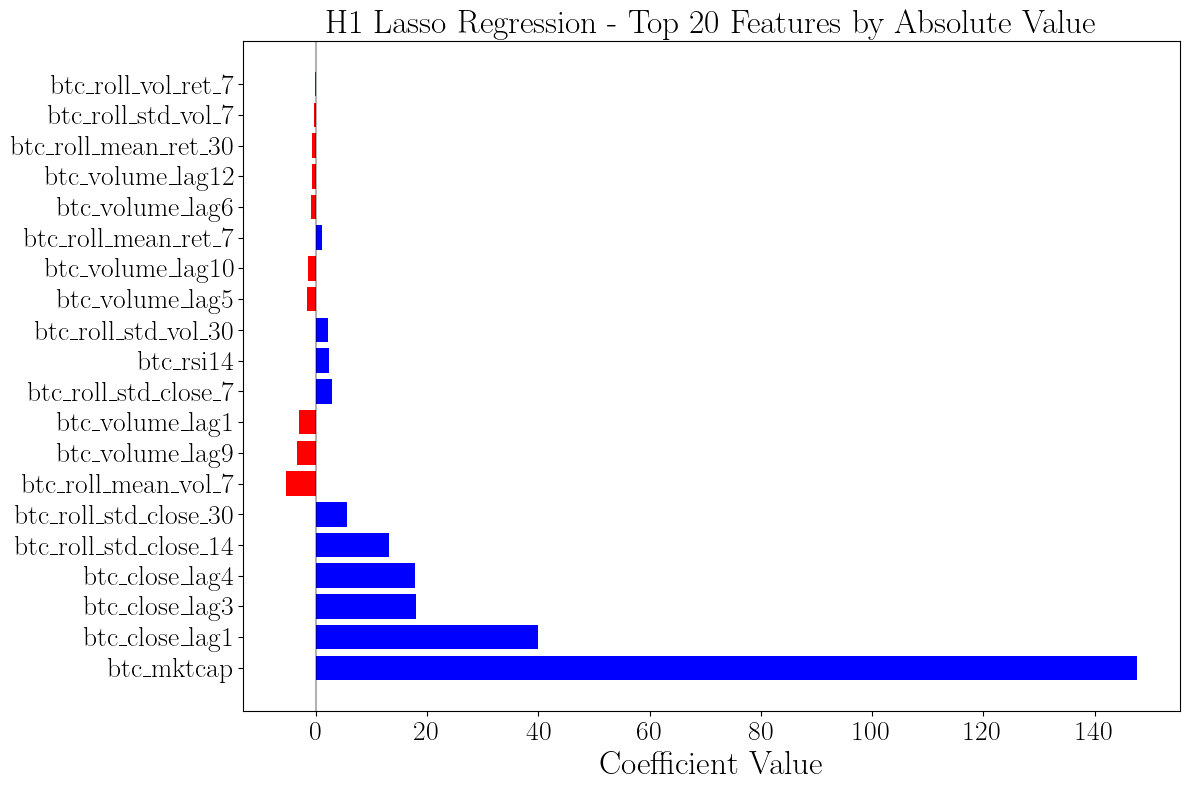

<Figure size 640x480 with 0 Axes>

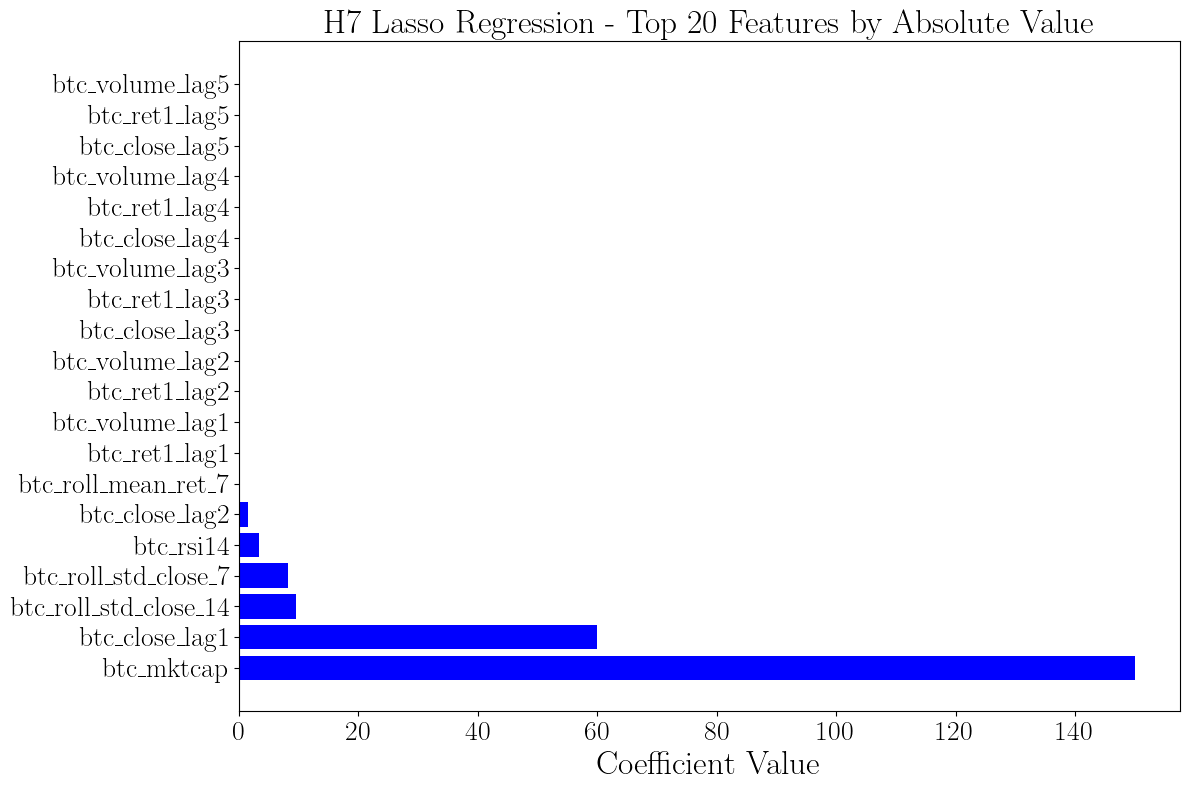

<Figure size 640x480 with 0 Axes>

In [9]:
print("Feature Importance Analysis")
print("="*50)
# H1 Lasso
h1_lasso_features = H1LassoModelWrap.plot_feature_importance(bundle_h1.feature_cols, 'H1 Lasso Regression', plot_name=plot_dir+'h1_lasso_coefs.pdf')
# H7 Lasso  
h7_lasso_features = H7LassoModelWrap.plot_feature_importance(bundle_h7.feature_cols, 'H7 Lasso Regression', plot_name=plot_dir+'h7_lasso_coefs.pdf')

## üìà Ridge Performance ‚Äî Validation vs Test

In [10]:
# Feature importance for Lasso models
ridge_h1 = [m for m in runner_h1.models if m.name == "Ridge"][0]
ridge_h7 = [m for m in runner_h7.models if m.name == "Ridge"][0]
H1RidgeModelWrap = ModelWrapper("H1", ridge_h1.model)
H7RidgeModelWrap = ModelWrapper("H7", ridge_h7.model)

Feature Importance Analysis


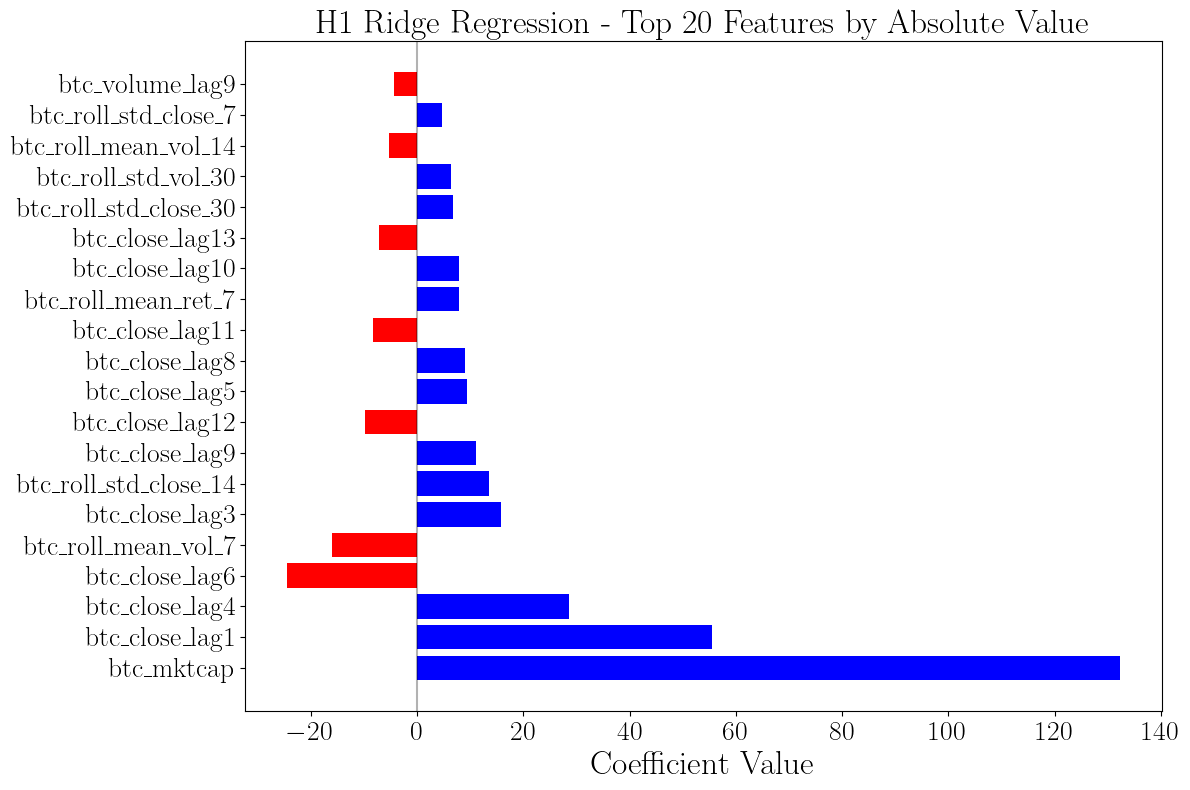

<Figure size 640x480 with 0 Axes>

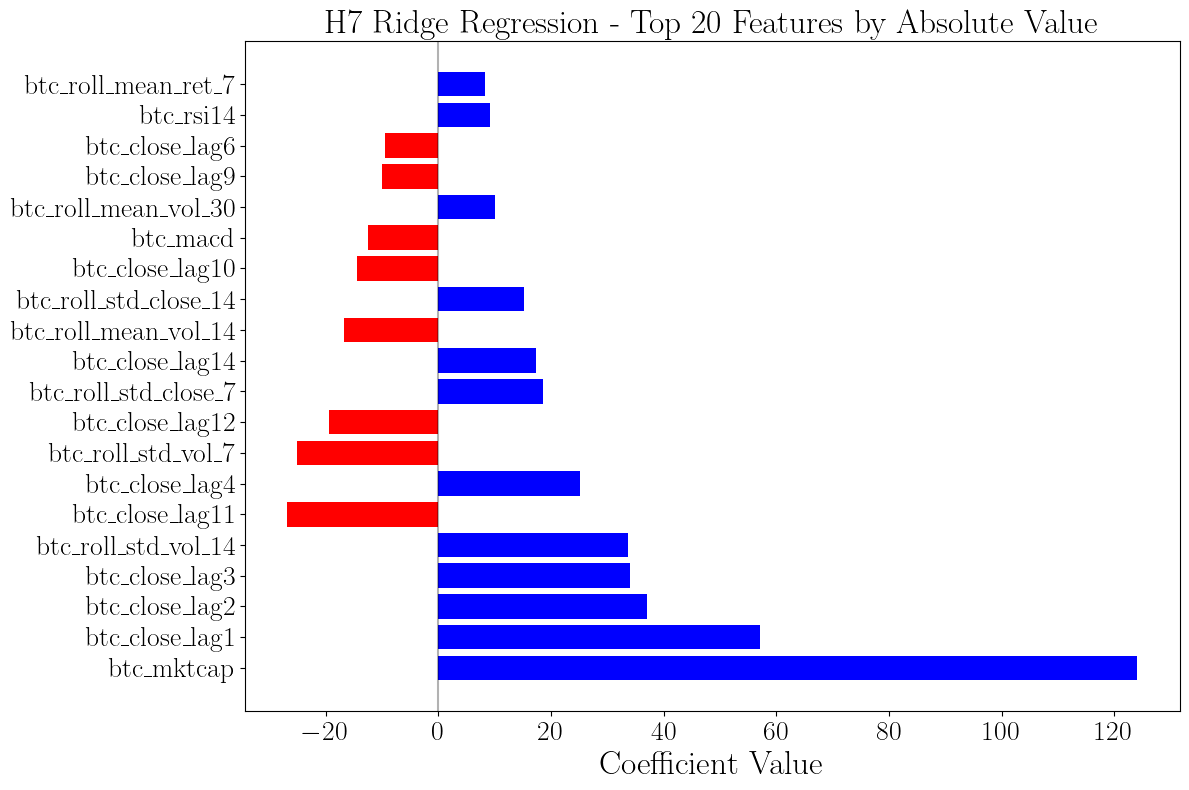

<Figure size 640x480 with 0 Axes>

In [11]:
print("Feature Importance Analysis")
print("="*50)
# H1 Ridge
h1_ridge_features = H1RidgeModelWrap.plot_feature_importance(bundle_h1.feature_cols, 'H1 Ridge Regression', plot_name=plot_dir+'h1_ridge_coefs.pdf')
# H7 Lasso  
h7_ridge_features = H7RidgeModelWrap.plot_feature_importance(bundle_h7.feature_cols, 'H7 Ridge Regression', plot_name=plot_dir+'h7_ridge_coefs.pdf')

## üèÜ Best Model Summary (Chosen by Validation RMSE)

For **each horizon**, we pick the model  with the **lowest Validation RMSE**, then report its **R2** and **Test_MSE** metrics.  



In [12]:
# -- Produce and print the best-model summary (pick by Validation RMSE; show Test metrics)
best_summary = ModelWrapper.best_summary(results_df_classes, metric="RMSE", prefer_scaled=None)
print("\n" + "="*80)
print("BEST MODEL SUMMARY ‚Äî picked by lowest Validation RMSE; Test metrics shown")
print("="*80)
print(best_summary.to_string(index=False, float_format="%.6f"))
print("\n" + "="*80)
print("BEST MODEL SUMMARY ‚Äî picked by lowest Validation R2; Test metrics shown")
print("="*80)
best_summaryR2 = ModelWrapper.best_summary(results_df_classes, metric="R2", prefer_scaled=None)
print(best_summaryR2.to_string(index=False, float_format="%.6f"))

H1LassoNonZeroCoef = H1LassoModelWrap.get_lasso_nonzero_coef()
H7LassoNonZeroCoef = H7LassoModelWrap.get_lasso_nonzero_coef()
result = (
    f"H1: {H1LassoNonZeroCoef}/{len(bundle_h1.feature_cols)} features selected | "
    f"H7: {H7LassoNonZeroCoef}/{len(bundle_h7.feature_cols)} features selected"
)
print("\nLasso coefficients (the rest are shrunk to zero): ",result)




BEST MODEL SUMMARY ‚Äî picked by lowest Validation RMSE; Test metrics shown
Horizon               Model Scaled?  Val_RMSE            MSE        RMSE        MAE  RMSE_ND   MAE_ND       R2
     H1 B-Spline with Ridge     Yes 25.189557  558335.472831  747.218491 390.790110 0.161906 0.084676 0.973787
     H7 B-Spline with Ridge     Yes 55.453316 1893377.790031 1376.000650 769.819472 0.298091 0.166770 0.911142

BEST MODEL SUMMARY ‚Äî picked by lowest Validation R2; Test metrics shown
Horizon               Model Scaled?   Val_R2            MSE        RMSE        MAE  RMSE_ND   MAE_ND       R2
     H1 B-Spline with Ridge     Yes 0.972151  558335.472831  747.218491 390.790110 0.161906 0.084676 0.973787
     H7 B-Spline with Ridge     Yes 0.865529 1893377.790031 1376.000650 769.819472 0.298091 0.166770 0.911142

Lasso coefficients (the rest are shrunk to zero):  H1: 20/58 features selected | H7: 7/58 features selected


## üß≠ Baselines & Diagnostics 
  1. Compare model performance across different prediction timeframes
  2. Regularization effects of Ridge vs Lasso regression
  3. Feature selection capabilities of Lasso regression
  4. Model stability across validation and test sets


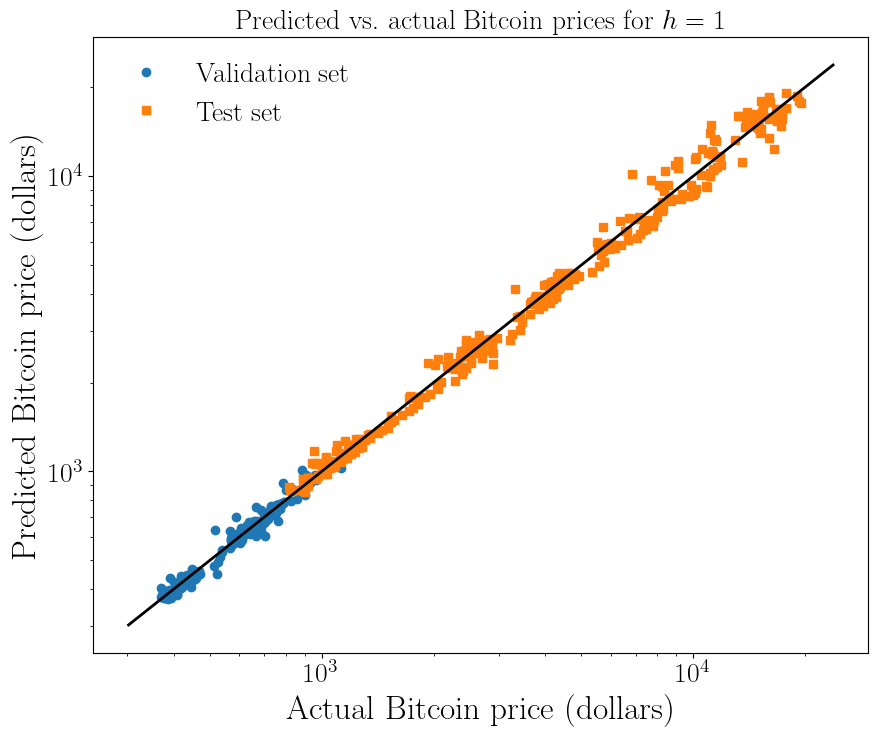

In [13]:
# Create a plot of actual vs. predicted Bitcoin prices for the best h = 1 model, which is the B-spline + Ridge regression model.
bundle = bundle_h1
best_h1 = [m for m in runner_h1.models if m.name == "B-Spline with Ridge"][0]
yhat_val = best_h1.predict(bundle.X_val)
yhat_test = best_h1.predict(bundle.X_test)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(bundle.y_val, yhat_val, 'o', color=plot_colors[0], label='Validation set')
ax.plot(bundle.y_test, yhat_test, 's', color=plot_colors[1], label='Test set')
ax.set_xscale('log')
ax.set_yscale('log')
# Add black line for y = x, representing a perfect fit.
min_val = min(ax.get_xlim()[0], ax.get_ylim()[0])
max_val = max(ax.get_xlim()[1], ax.get_ylim()[1])
x_line = np.linspace(min_val, max_val, 100) 
ax.plot(x_line, x_line, color='k', linewidth=2)
ax.set_xlabel('Actual Bitcoin price (dollars)', fontsize=24)
ax.set_ylabel('Predicted Bitcoin price (dollars)', fontsize=24)
ax.set_title(rf'Predicted vs.\ actual Bitcoin prices for $h=1$', fontsize=20)
ax.legend(prop={'size': 20}, frameon=False, loc='best', ncol=1)
fig.set_size_inches(10, 8)
fig.savefig(plot_dir+'actual_vs_predicted_h1.pdf', format='pdf', bbox_inches='tight')

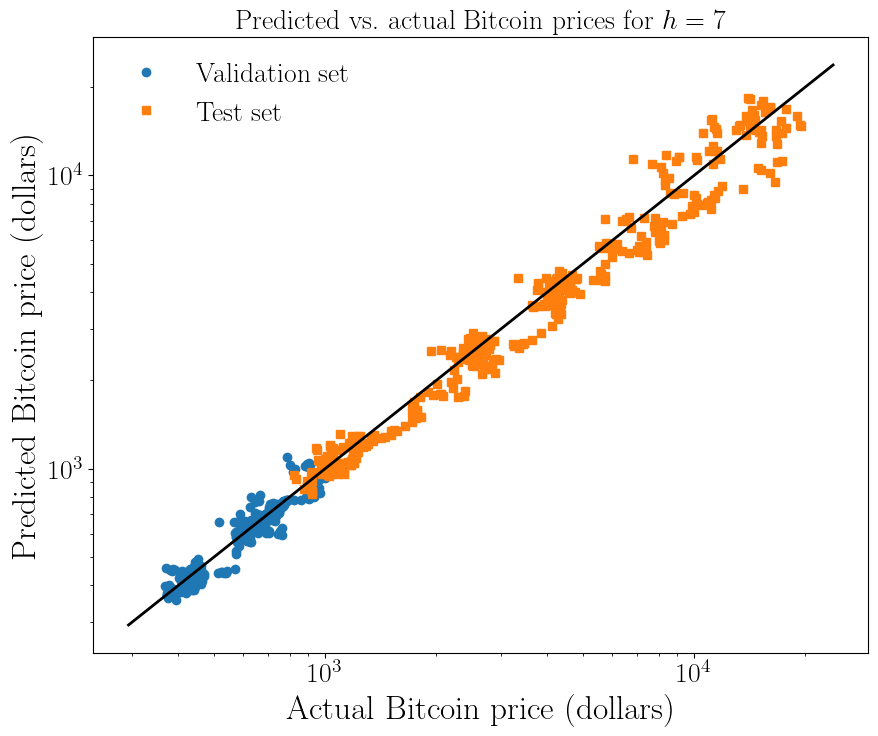

In [16]:
# Create a plot of actual vs. predicted Bitcoin prices for the best h = 7 model, which is the the B-spline + Ridge regression model.
bundle = bundle_h7
best_h7 = [m for m in runner_h7.models if m.name == "B-Spline with Ridge"][0]
yhat_val = best_h7.predict(bundle.X_val)
yhat_test = best_h7.predict(bundle.X_test)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(bundle.y_val, yhat_val, 'o', color=plot_colors[0], label='Validation set')
ax.plot(bundle.y_test, yhat_test, 's', color=plot_colors[1], label='Test set')
ax.set_xscale('log')
ax.set_yscale('log')
# Add black line for y = x, representing a perfect fit.
min_val = min(ax.get_xlim()[0], ax.get_ylim()[0])
max_val = max(ax.get_xlim()[1], ax.get_ylim()[1])
x_line = np.linspace(min_val, max_val, 100) 
ax.plot(x_line, x_line, color='k', linewidth=2)
ax.set_xlabel('Actual Bitcoin price (dollars)', fontsize=24)
ax.set_ylabel('Predicted Bitcoin price (dollars)', fontsize=24)
ax.set_title(rf'Predicted vs.\ actual Bitcoin prices for $h=7$', fontsize=20)
ax.legend(prop={'size': 20}, frameon=False, loc='best', ncol=1)
fig.set_size_inches(10, 8)
fig.savefig(plot_dir+'actual_vs_predicted_h7.pdf', format='pdf', bbox_inches='tight')

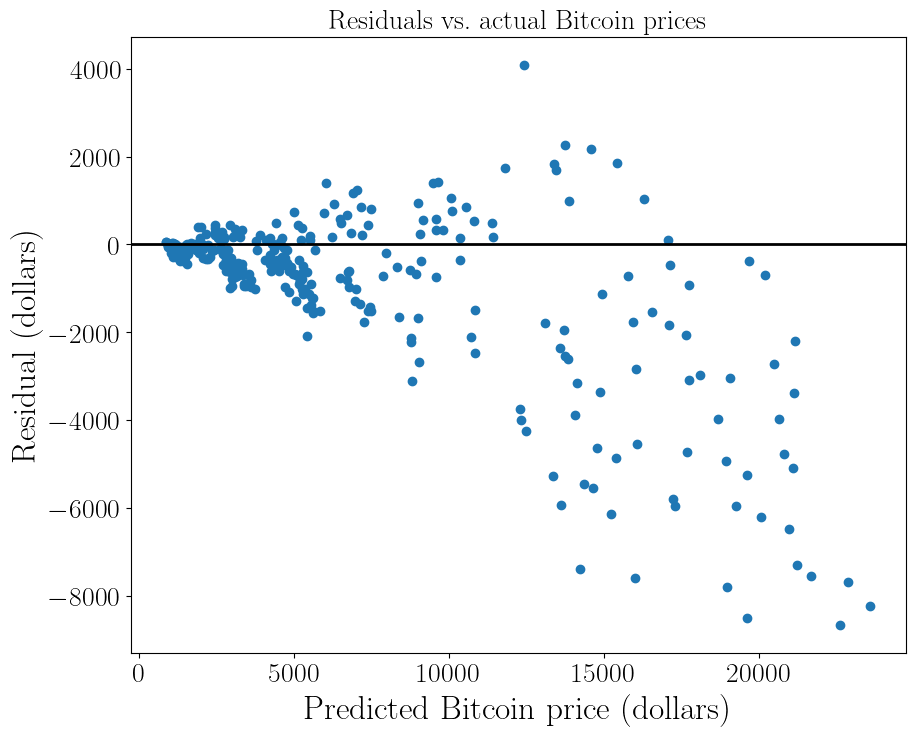

In [15]:
residuals = H7LinearModelWrap.calculate_residuals(bundle_h7.X_test, bundle_h7.y_test)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(yhat_test, residuals, 'o', color=plot_colors[0])
plt.axhline(y=0, color='k', linestyle='-', linewidth=2)
ax.set_xlabel('Predicted Bitcoin price (dollars)', fontsize=24)
ax.set_ylabel('Residual (dollars)', fontsize=24)
ax.set_title(rf'Residuals vs.\ actual Bitcoin prices', fontsize=20)
fig.set_size_inches(10, 8)
fig.savefig(plot_dir+'residuals_h7.pdf', format='pdf', bbox_inches='tight')